# Ler o arquivo de coleta síncrona

In [22]:
import pandas as pd
import os
import io

In [23]:
data_path = "/Users/anasouza/ppgeb_masters/data/teste_ana.txt"

In [24]:
data_list = []
with io.open(data_path, mode="r", encoding="utf-8") as f:
    for line in f:
        data_list.append(line.rstrip().split())

In [25]:
df = pd.DataFrame(data_list)

In [26]:
df. columns=df.iloc[0] 

In [27]:
df = df.iloc[1:]

In [28]:
df.iloc[-1,-1] = df.iloc[-1,3]

In [29]:
df = df.loc[df['DATATYPE'] != 'MSG']

In [30]:
import plotly

In [31]:
df.USER = df.USER.replace('START_RECORDING', 100).replace('STOP_EYETRACKER',200).replace('CLIENT2_READY', 0)

In [32]:
import numpy as np

df = df.replace(np.nan, 0)

In [33]:
df.USER = df.USER.astype(int)

In [34]:
import plotly.express as px


fig = px.line(df, x='TIME', y="USER")
fig.show()

In [35]:
df.columns

Index(['DATATYPE', 'CNT', 'TIME', 'LPCX', 'LPCY', 'LPD', 'LPS', 'LPV', 'RPCX',
       'RPCY', 'RPD', 'RPS', 'RPV', 'LEYEX', 'LEYEY', 'LEYEZ', 'LPUPILD',
       'LPUPILV', 'REYEX', 'REYEY', 'REYEZ', 'RPUPILD', 'RPUPILV', 'BKID',
       'BKDUR', 'BKPMIN', 'USER'],
      dtype='object', name=0)

In [36]:
import plotly.express as px


fig = px.line(df, x='TIME', y="BKID")
fig.show()

In [37]:
df.BKID = df.BKID.astype(int)

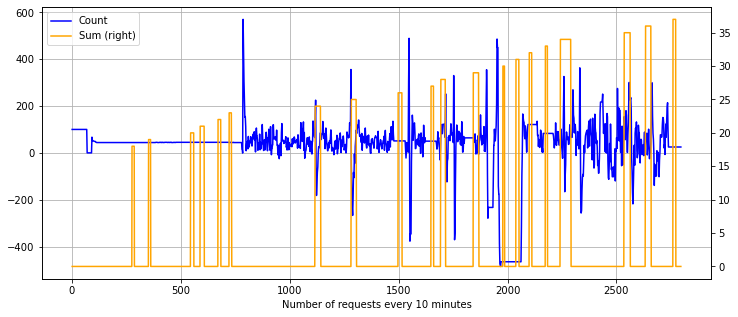

In [38]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')

ax1 = df.USER.plot(color='blue', grid=True, label='Count')
ax2 = df.BKID.plot(color='orange', grid=True, secondary_y=True, label='Sum')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [ ]:
# Probability function of signal amplitude == possible blink?

/Users/anasouza/opt/anaconda3/envs/python-sync/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1



y2 is 1.0008140670791272 behind y1


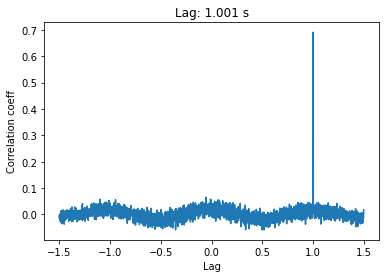

In [46]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


def lag_finder(y1, y2, sr):
    n = len(y1)

    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])

    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    print('y2 is ' + str(delay) + ' behind y1')

    plt.figure()
    plt.plot(delay_arr, corr)
    plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
    plt.xlabel('Lag')
    plt.ylabel('Correlation coeff')
    plt.show()

# Sine sample with some noise and copy to y1 and y2 with a 1-second lag
sr = 1024
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 5, y.shape)
y1 = y[sr:4*sr]
y2 = y[:3*sr]

lag_finder(y1, y2, sr)

In [39]:
df

,DATATYPE,CNT,TIME,LPCX,LPCY,LPD,LPS,LPV,RPCX,RPCY,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,BKID,BKDUR,BKPMIN,USER
1,SMP,3044,55.52422,0.56619,0.48659,11.54351,1.14683,1,0.85490,0.57672,...,1,0.02710,-0.00230,0.61262,0.00397,1,0,0.00000,17,100
2,SMP,3045,55.54046,0.56615,0.48638,11.44779,1.14683,1,0.85483,0.57686,...,1,0.02710,-0.00230,0.61262,0.00400,1,0,0.00000,17,100
3,SMP,3046,55.55647,0.56615,0.48638,11.44779,1.14683,1,0.85483,0.57686,...,1,0.02710,-0.00230,0.61262,0.00400,1,0,0.00000,17,100
4,SMP,3047,55.57299,0.56598,0.48684,11.07421,1.14683,1,0.85483,0.57669,...,1,0.02710,-0.00230,0.61262,0.00394,1,0,0.00000,17,100
5,SMP,3048,55.58952,0.56619,0.48659,11.54351,1.14683,1,0.85503,0.57686,...,1,0.02710,-0.00230,0.61262,0.00394,1,0,0.00000,17,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,SMP,5041,90.28777,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25
2793,SMP,5042,90.30318,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25
2794,SMP,5043,90.31960,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25
2795,SMP,5044,90.34824,0.56733,0.43811,9.62845,1.14683,0,0.86899,0.55572,...,1,0.04612,-0.00466,0.64579,0.00337,1,0,0.00000,29,25


In [44]:
os.getcwd()

'/Users/anasouza/ppgeb_masters/python_syncronization'

In [45]:
df.to_csv("/Users/anasouza/ppgeb_masters/data/transf_tste_ana.csv")

In [39]:
# Correlação Cruzada de duas ondas 

In [21]:
!pip install pyEDFlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.7 MB/s eta 0:00:0000:0100:01
